<a href="https://colab.research.google.com/github/javeriiaaa/noodle-doodle/blob/master/weather_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot
import numpy
import seaborn as sns 

In [ ]:
from google.colab import files
file=files.upload()

Saving tennis.csv to tennis.csv


In [ ]:
df=pd.read_csv('tennis.csv', encoding='latin-1')
# df = df.drop(df.columns[0], axis=1) 
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [ ]:
type(df['play'])
df["play"].replace({'yes': 1, 'no': 0}, inplace=True)
df=pd.get_dummies(df)

df

,windy,play,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal
0,False,0,0,0,1,0,1,0,1,0
1,True,0,0,0,1,0,1,0,1,0
2,False,1,1,0,0,0,1,0,1,0
3,False,1,0,1,0,0,0,1,1,0
4,False,1,0,1,0,1,0,0,0,1
5,True,0,0,1,0,1,0,0,0,1
6,True,1,1,0,0,1,0,0,0,1
7,False,0,0,0,1,0,0,1,1,0
8,False,1,0,0,1,1,0,0,0,1
9,False,1,0,1,0,0,0,1,0,1


In [ ]:
type(df['windy'])
df["windy"].replace({True: 1, False: 0}, inplace=True)
df

,windy,play,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal
0,0,0,0,0,1,0,1,0,1,0
1,1,0,0,0,1,0,1,0,1,0
2,0,1,1,0,0,0,1,0,1,0
3,0,1,0,1,0,0,0,1,1,0
4,0,1,0,1,0,1,0,0,0,1
5,1,0,0,1,0,1,0,0,0,1
6,1,1,1,0,0,1,0,0,0,1
7,0,0,0,0,1,0,0,1,1,0
8,0,1,0,0,1,1,0,0,0,1
9,0,1,0,1,0,0,0,1,0,1


In [ ]:

labels = ['play']
features = [a  for a in df.columns if a not in labels ]
# features
# y = df[labels[0]]
x= df[features]
features

['windy',
 'outlook_overcast',
 'outlook_rainy',
 'outlook_sunny',
 'temp_cool',
 'temp_hot',
 'temp_mild',
 'humidity_high',
 'humidity_normal']

In [ ]:
X_train=df[features]
X_train

,windy,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal
0,0,0,0,1,0,1,0,1,0
1,1,0,0,1,0,1,0,1,0
2,0,1,0,0,0,1,0,1,0
3,0,0,1,0,0,0,1,1,0
4,0,0,1,0,1,0,0,0,1
5,1,0,1,0,1,0,0,0,1
6,1,1,0,0,1,0,0,0,1
7,0,0,0,1,0,0,1,1,0
8,0,0,0,1,1,0,0,0,1
9,0,0,1,0,0,0,1,0,1


In [ ]:
y_train = pd.DataFrame(df['play'])
y_train

,play
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1


NameError: ignored

In [ ]:
from sklearn.naive_bayes import GaussianNB


In [ ]:
model = GaussianNB()

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
tuple=[0,1,0,1, 1, 0, 0, 1, 0]
predicted= model.predict([tuple])

if(predicted==1):
  print('play')
else:
  print('No play')

play


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

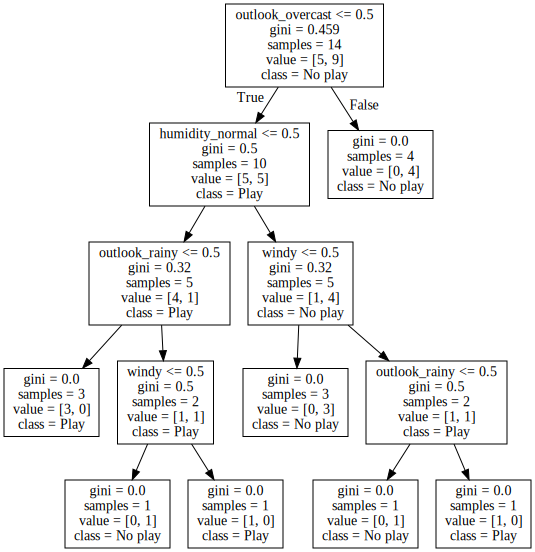

In [ ]:
dot_data = export_graphviz(tree, out_file = None, feature_names =x.columns, class_names = ['Play', 'No play'])
graph = graphviz.Source(dot_data)
graph